**Name:** Yutika Rege

**PRN:** 1901202012

**DS303:** Machine Learning 1

**Importing all the necessary libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

**Reading in the dataset:**

In [2]:
adv = r"C:\\Users\\Yutika\\Downloads\\datasets\\Advertising.csv"
df = pd.read_csv(adv)
df = df[["TV","radio","newspaper","sales"]]

## Performing basic EDA:

* **Viewing the head of the dataset**

In [3]:
df.head(3).transpose()

,0,1,2
TV,230.1,44.5,17.2
radio,37.8,39.3,45.9
newspaper,69.2,45.1,69.3
sales,22.1,10.4,9.3


* **Column names:**

In [4]:
col_names = pd.DataFrame(df.columns, columns=["Column names"])
col_names

,Column names
0,TV
1,radio
2,newspaper
3,sales


* **Shape:**

In [5]:
print(f"Shape of the entire dataset:\n\nNo. of rows: {df.shape[0]}\nNo. of cols: {df.shape[1]}")

Shape of the entire dataset:

No. of rows: 200
No. of cols: 4


* **NaN values:**

In [6]:
print(f"There are {df.isnull().sum().sum()} NaN values in the dataset.")

There are 0 NaN values in the dataset.


* **Summary stats:**

In [7]:
print("Summary statistics:\n")
df.describe(include="all").transpose()

Summary statistics:



,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


* **Information about the dataset (to gain insights about the data types and null values):**

In [8]:
print("Basic info:\n")
df.info()

Basic info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Comments:

> As for the dimensions, this data set has 200 rows and 4 columns (features) altogether; out of which 3 features are independent _viz._ "TV", "Radio", "Newspaper" and the dependent feature - "Sales". There are however a few missing values. The data type of all of these features is _float64_ meaning; they are all numeric. One of the aspects of measuring the quality of data is that it must not have any null values. This prerequisite has been fulfilled however, another aspect of good quality data is that it must not have any outliers which might result in counterproductivity in terms of the output produced. To check for outliers, it is imperative to plot a boxplot, which shall provide insights about the existence and impact of outliers.

* **Boxplots for the various features:**

Text(0.5, 1.0, 'Boxplots for the dataset features')

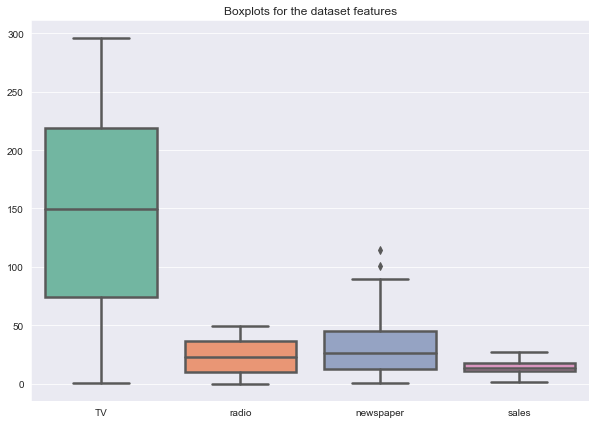

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, palette="Set2",linewidth=2.5)
plt.title("Boxplots for the dataset features")

* **Outlier removal:**

In [11]:
print("The 2 outliers in the Newspaper variable:-\n\n",df["newspaper"].sort_values(ascending=False).head(2))

The 2 outliers in the Newspaper variable:-

 16     114.0
101    100.9
Name: newspaper, dtype: float64


### Comments:

> It seems as though only one feature "Newspaper" has outliers which fall beyond the upper fence of 100 datapoints' range. There are 2 outliers however these are manageable. We will let those outliers be since they do not severly affect the dependent variable.

## Analysis of impact of each independent feature on the target feature:

In [12]:
print(f"=> Covariance of variables with each other:\n{df.cov()}\n\n")
print(f"=> Correlation of variables with each other:\n{df.corr()}")

=> Covariance of variables with each other:
                    TV       radio   newspaper       sales
TV         7370.949893   69.862492  105.919452  350.390195
radio        69.862492  220.427743  114.496979   44.635688
newspaper   105.919452  114.496979  474.308326   25.941392
sales       350.390195   44.635688   25.941392   27.221853


=> Correlation of variables with each other:
                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


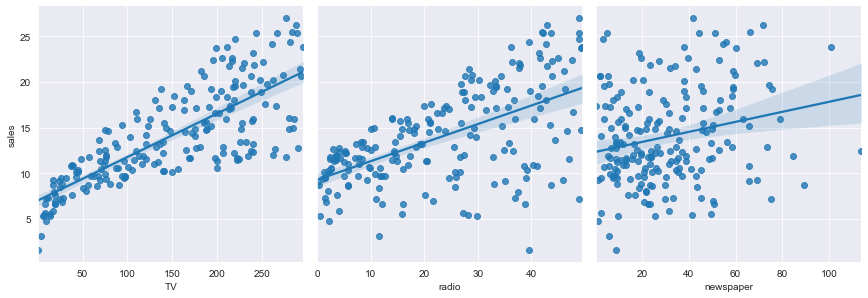

In [13]:
sns.pairplot(df,x_vars=["TV","radio","newspaper"],y_vars="sales",kind="reg",height=4)

### Comments:

> All the independent features seem to share a negative correlation and covariance to a large extent with each other but, share a strong positive relation with the target feature sales, in an individual capacity. Since this is a multiple linear regression model under consideration, the best features would be determined based on feature selection methods such as forward selection or backward elimination but for now, we would be using the "all-in" feature selection approach and not consider multicollinearity since the sklearn library takes care of the balancing of coefficients to fit the model.

## Feature selection and model building:

In [16]:
X = df[['TV', 'radio', 'newspaper']]
y = df["sales"]

In [17]:
X_test,X_train,y_test,y_train = tts(X,y,test_size=0.2)

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
y_hat = regressor.predict(X_test)

###  Metrics for evaluating the regressor:

In [21]:
print("The intercept of our equation:",round(regressor.intercept_,4))

The intercept of our equation: 2.3565


In [24]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
TV,0.045149
radio,0.197166
newspaper,0.008259


In [41]:
mae = metrics.mean_absolute_error(y_test,y_hat)
mse = metrics.mean_absolute_error(y_test,y_hat)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_hat)

print(f"MAE  : {mae}\nMSE  : {mse}\nRMSE : {rmse}\nR^2  : {round(r2,4)*100}%")

MAE  : 1.3096786106345624
MSE  : 1.3096786106345624
RMSE : 1.1444119060174804
R^2  : 89.23%


### Test prediction:

In [36]:
regressor.predict([[230.1,37.8,69.2]])

array([20.76959288])

## Comments:

> As per our metrics, the optimal R$^2$ value of our regressor in 89.23% which means that it predicts our sales at that accuracy. The magnitude of the coefficients is fairly low.